# Simple Linear Regression

__Linear Regression Learning Objectives__ 
* Population vs Sample
* Degrees of Freedom
* Subpopulations
* Statistical Models
* Confidence Intervals
* Prediction Intervals

__Salmon Learning Objectives__ 
* Model Fit Table
* Confidence Intervals
* Prediction Intervals

In [19]:
import pandas as pd
from salmon import *
%matplotlib inline
plt.style.use('seaborn')

## Linear Regression and Statistical Modeling
In the previous notebook, we foused on building linear models for a __sample__ of data points; this was denoted by using $b_0$ and $b_1$. We estimated our true parameters, $\beta_0$ and $\beta_1$, because we did not have the __population__ of points to calculate from. Usually, the population data is not available. Because we used a sample, if we took a different sample of points, we would get a different regression line with different parameters. To illustrate, let's fit a regression line for three different groups results from the speed of sound lab. 

<table><tr><td style="text-align:center">$y = -0.008788 + 85.454312t$<img src='images/chapter2/data1_reg_line.png'></td><td style="text-align:center">$y = -0.007386 + 84.979305t$<img src='images/chapter2/data2_reg_line.png'></td><td style="text-align:center">$y = -0.010120 + 85.963616t$<img src='images/chapter2/data3_reg_line.png'></td></tr></table>

Notice that all of the coefficients are different. If we were able to use the population data, we could calculate the __population regression line__, $\mu_y = \beta_0 + \beta_1x$. The population regression line gives us the mean response of a subpopulation of point occuring for each value of $t$. Each subpopulation is normally distributed and have the same standard deviation. From the population regression line, we can create a __statistical model__ for predicting points, $y = \beta_0 + \beta_1x + \varepsilon_i$ where $\varepsilon_i$ are the deviations from the population regression line. These deviations are normally distributed with a mean of 0 and a standard deviation of $\sigma^2$. 

#### Estimating the Model Parameters
Usually, data is a sample from the population of points, so, we will need to estimate the parameters of our statistical model from our sample data. From least squared regression, we can calculate $b_0$ and $b_1$ which are unbaised estimators of $\beta_0$ and $\beta_1$. To account for the deviations, $\varepsilon_i$, we can calculate the __residuals__ of our observed values by taking the difference between the predicted value and the observed value. (we called these the errors in chapter 1). The residuals sum to 0 and come from a population with a mean of 0. We also need to estimate the standard deviation of the residuals, $\sigma$. $$\sigma = \sqrt{\frac{\sum{\varepsilon_i^2}}{n-2}}$$
You may be curious to know why we divide our $\sum{\varepsilon_i^2}$ by $n-2$ instead of $n$. Remember that $\varepsilon_i$ is the i-th error ($\varepsilon_i$) or residual. The error term is calculated by $y_i - \hat{y_i}$; this can be expanded to $y_i - b_0 + b_1x_i$. Notice that $b_0$ and $b_1$ are part of this equation but, they can also be one of the n number of residuals. To remove bias, we use n-2 and this is the __degrees of freedom__.  

### Confidence Intervals
Since we are estimating the parameters our model, it would be nice to know how confident we are that they are correct. With confidence intervals, we can do that. For both confidence intervals, we will be using the t statistic. $t*$ is equal to the t value with n - 2 degrees of freedom for the given confidence level, usually 95%.

#### Confidence Interval for $b_0$
The confidence interval for $b_0$ is calculated as:
$$b_0 ± t*SE_{b_0}$$
where $SE_{b_0} = s \sqrt{\frac{1}{n} + \frac{\bar{x}^2}{\sum(x_i - \bar{x})^2}}$ 

#### Confidence Interval for $b_1$
The confidence interval for $b_1$ is calculated as:
$$b_1 ± t*SE_{b_1}$$
where $SE_{b_1} = \frac{s}{\sum(x_i - \bar{x})^2}$ 

With these confidence intervals, we can provide a level of certainty for the coefficients. For a concrete example, let's calculate the confidence intervals for the speed of sound coefficients using SALMON. Once you fit a model in SALMON, you're given all the tools you need to calculate the confidence interval at a 95% level.

#### Model Fitting and Parameter Confidence Intervals with SALMON
When we fit a model, we are performing least squared regression and estimating our parameters from our sample. With SALMON, we create two Q variables for our response and explanatory variable, create a linear model, then call `.fit(data)` with our data variable. Let's fit our model again for the speed of sound dataset.

In [27]:
data = pd.read_csv("data/chapter1/speed_of_sound.csv")
data["t"] = 1/data["f"]
explanatory = Q("t")
response = Q("L")
model = LinearModel(explanatory, response)
model.fit(data)

,Coefficients,SE,t,p
t,85.454312,0.633158,134.965320,0.000000
Intercept,-0.008788,0.001833,-4.794046,0.000559


From the `fit` output, we have both the SE and t value for both our period variable and intercept. With these values, we can calculate the confidence interval for $b_0$ and $b_1$. The slope interval, $b_0$, is [-0.0121, -0.0055]. For $b_1$, the interval is [84.317, 86.591] meaning that for every 1 increase in the period the tube length while increase between 84.317 and 86.591 with 95% confidence. Additionally, you can add a confidence band to your graph that displays the confidence interval at all values of x using `.plot(confidence_band=True)`.

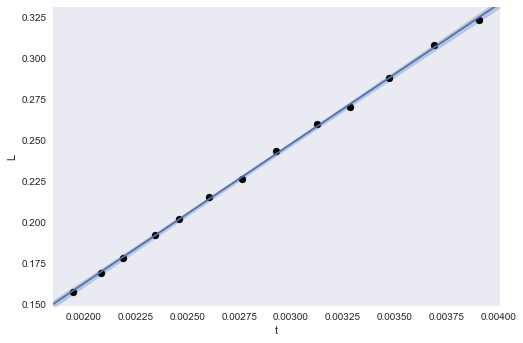

In [28]:
model.plot(confidence_band=True)

### Significance Testing
Significance testing is a helpful tool when analyzing your parameters. While there is a significance test for $b_0$ it is not useful. On the other hand, the significance test for $b_1$ can be extremely important and can tell us if x significantly affects y. 

#### Significance Test for $b_1$
To perform a significance test for $b_1$, we want to prove that disprove $H_0: \beta_1 = 0$. To do this, we compute the t statistic, $t = \frac{b_1}{SE_{b_1}}$, and look up the corresponding p-value. If the p-value is less than 0.05 then we have found a statistically significant relationship.

#### Significance Testing in SALMON
Just like above, all we need to do is fit a model and SALMON provides us with both the t statistic and the p-value. Let's see if there is a statistically significant relationship between drug concentration and math scores from our example in chapter 1.

In [20]:
data = pd.read_csv("data/chapter2/lsd.csv")
explanatory = Q("lsd")
response = Q("math")
model = LinearModel(explanatory, response)
model.fit(data)

,Coefficients,SE,t,p
lsd,-9.009466,1.503076,-5.994017,0.001854
Intercept,89.123874,7.047547,12.646085,0.000055


As you can see, the $b_1$, lsd, p values is well below 0.05. From this, we can determine that there is a statistically significant relationship between LSD and Math score and we proved that the drug concentration does affect the math score result. 

### Prediction Intervals
With our linear model above, we are able to predict new values of y when given new values of x just by plugging the new value in. But, our model was built using estimated parameters so we need prediction intervals to tell us how good our predictions are. The formula is similar to the confidence intervals: 
$$\hat{y} ± t*SE_{\hat{y}}$$
where $SE_{\hat{y}} = s \sqrt{1 + \frac{1}{n} + \frac{(x* - \bar{x})^2}{\sum(x_i - \bar{x})^2}}$ 

#### Prediction Intervals in SALMON
Predicting intervals are easy in SALMON. To plot the prediction interval band, use the function `.plot(prediction_band=True)`. 

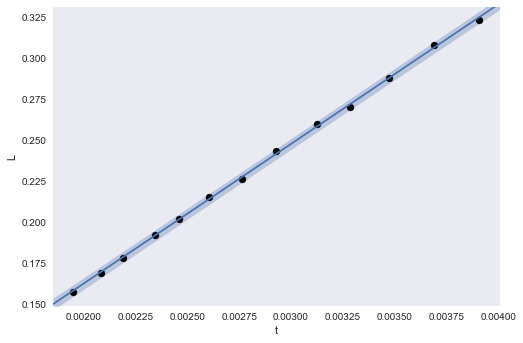

In [29]:
model.plot(prediction_band=True)